In [2]:
import numpy as np 

from tqdm import * 
import pickle

import matplotlib.pyplot as plt 
%matplotlib inline 

# plot gradient comparison with Spherical and Gaussian

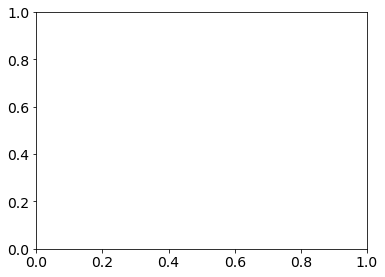

In [51]:
xs = [np.array([0]*500), np.array([np.pi/4.]*500) ] 

deltas = [ 0.1, 0.01, 0.001 ] 

ks = [ 100,200,300,400,500 ] 

reps = 10

n = 500 

for i in range(len(xs)):
    
    x = xs[0]
    
    truth = (np.array( [ np.cos(x) ]*n ) + np.array( [(x[1] + 2)* np.exp( (x[0]-1)*(x[1]+2) ) 
                                                 , (x[0] - 1)* np.exp( (x[0]-1)*(x[1]+2) ) ] + [0]*(n-2) ) )[0] 
    
    for delta in deltas:
        
        for k in ks: 
                
            stiefel_errors = pickle.load( 
                        open('./raw_results/stiefel_errors_x{0}_delta{1}_k{2}'.format(i,delta,k), 'rb' ) ) 
            spherical_errors = pickle.load( 
                        open('./raw_results/spherical_errors_x{0}_delta{1}_k{2}'.format(i,delta,k), 'rb' ) ) 
            gaussian_errors = pickle.load( 
                        open('./raw_results/gaussian_errors_x{0}_delta{1}_k{2}'.format(i,delta,k), 'rb' ) )             
            
            plt.rcParams['font.size'] = 14
            
            plt.scatter( [1]*len(stiefel_errors), stiefel_errors, alpha = 0.4, s = 50 )
            
            plt.scatter( [2]*len(spherical_errors), spherical_errors, alpha = 0.4, s = 50 )
            
            plt.scatter( [3]*len(gaussian_errors), gaussian_errors, alpha = 0.4, s = 50 ) 
            
            plt.xticks([1,2,3], ['Stiefel', 'Spherical', 'Gaussian'])
            
            plt.ylabel('Error')
            
            plt.tight_layout()
            
            plt.savefig( './figures/grad_x{0}_delta{1}_k{2}.png'.format(i,delta,k) , dpi = 150 )
            
            plt.cla()
            

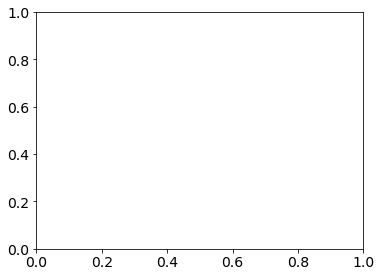

In [15]:
xs = [np.array([0]*500), np.array([np.pi/4.]*500) ] 

deltas = [ 0.1, 0.01, 0.001 ] 

ks = [ 100,200,300,400,500 ] 

sparsity = [ 100, np.inf ] 

reps = 10

n = 500 

for i in range(len(xs)): 
    
    x = xs[0]
    
    truth = (np.array( [ np.cos(x) ]*n ) + np.array( [(x[1] + 2)* np.exp( (x[0]-1)*(x[1]+2) ) 
                                                 , (x[0] - 1)* np.exp( (x[0]-1)*(x[1]+2) ) ] + [0]*(n-2) ) )[0] 
    
    for delta in deltas: 
        
        for k in ks: 
            
#             for s in sparsity: 
                
            stiefel_errors = pickle.load( 
                open('./raw_results/stiefel_cos_sim_x{0}_delta{1}_k{2}'.format(i,delta,k), 'rb' ) ) 


            comp_errors1 = pickle.load( 
                open('./raw_results/comp_cos_sim_x{0}_delta{1}_k{2}_sparsity100'.format(i,delta,k), 'rb' ) ) 

            comp_errors2 = pickle.load( 
                open('./raw_results/comp_cos_sim_x{0}_delta{1}_k{2}_sparsityinf'.format(i,delta,k), 'rb' ) ) 

            plt.rcParams['font.size'] = 14

            plt.scatter( [1]*len(stiefel_errors), stiefel_errors, alpha = 0.4, s = 50 )

            plt.scatter( [2]*len(comp_errors1), comp_errors1, alpha = 0.4, s = 50 )

            plt.scatter( [3]*len(comp_errors2), comp_errors2, alpha = 0.4, s = 50 ) 

            plt.xticks([1,2,3], ['Stiefel', 'Comp-based (sparse)', 'Comp-based']) 

            plt.ylabel('Cosine Similarity') 

            plt.tight_layout() 

            plt.savefig( './figures/grad_comp_x{0}_delta{1}_k{2}.png'.format(i,delta,k) , dpi = 150 )

            plt.cla()

# plot Hessian comparison with Spherical and Gaussian

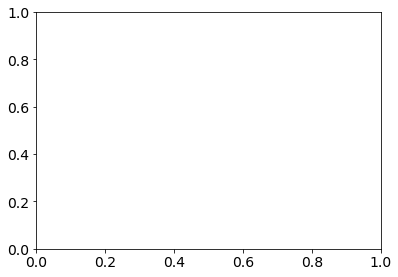

In [14]:
n = 100

xs = [np.array([0]*n), np.array([np.pi/4.]*n), -np.array([np.pi/2.]*n) ] 
locs = ['0', '0.25pi', 'n0.5pi']

deltas = [ 0.1, 0.01, 0.001 ] 

ks = [ 20, 40, 60, 80, 100 ] 

reps = 10

for i in range(len(xs)):
    
    x = xs[i]
    loc = locs[i]
        
    for delta in deltas: 
        
        for k in ks: 
                
            stiefel_errors = pickle.load( 
                        open('./raw_results/stiefel_hess_errors_x{0}_delta{1}_k{2}'.format(loc,delta,k), 'rb' ) ) 
            spherical_errors = pickle.load( 
                        open('./raw_results/spherical_hess_errors_x{0}_delta{1}_k{2}'.format(loc,delta,k), 'rb' ) ) 
            gaussian_errors = pickle.load( 
                        open('./raw_results/gaussian_hess_errors_x{0}_delta{1}_k{2}'.format(loc,delta,k), 'rb' ) ) 
            
            plt.rcParams['font.size'] = 14 
            
            plt.scatter( [1]*len(stiefel_errors), stiefel_errors, alpha = 0.4, s = 50 ) 
            
            plt.scatter( [2]*len(spherical_errors), spherical_errors, alpha = 0.4, s = 50 ) 
            
            plt.scatter( [3]*len(gaussian_errors), gaussian_errors, alpha = 0.4, s = 50 ) 
            
            plt.xticks([1,2,3], ['Stiefel', 'Spherical', 'Gaussian']) 
            
            plt.ylabel('Error') 
                        
            plt.tight_layout() 
                        
            plt.savefig( './figures/hess_x{0}_delta{1}_k{2}.png'.format(loc,delta,k) , dpi = 150 )
                    
            plt.cla() 
            